In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#connect to your google drive

Mounted at /content/drive


In [ ]:
!pip install torchinfo
# this model is used for print the model structure
# you can ignore this step, but remember to comment out the import code in re_NET_lw.py(line7)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.chdir('/content/drive/MyDrive/K-MEANS/UNET')
#cd your file floder

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
#check_ torch and cuda version

1.13.1+cu116
True


In [ ]:
!pip list
#check colab pip
# if you want to localize this repository, you can refer this.

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        6.0.0
blis  

Mask fomat in this repository is inherited from Carvana data(https://www.kaggle.com/c/carvana-image-masking-challenge)

The structrue of data folder:
```
├─Carvanadata
│   ├─ train_images # images for training (.jpg)
│   ├─ train_masks # masks for training (.png)
│   ├─ val_images # images for validating (.jpg)
│   ├─ val_masks # masks for validating (.png)
```

---


The names of images and masks must be in One-to-one correspondence!

I offer examples in Carvanadata folder. Check it for more information.



In [ ]:
!python re_NET_lw.py
# this is a model structure generated by torchinfo
# you can check the input tensor scale in re_NET_lw.py 
# test() fuction


torch.Size([3, 1, 256, 256])
Layer (type:depth-idx)                        Output Shape              Param #
REUNET                                        [3, 1, 256, 256]          --
├─ModuleList: 1-13                            --                        (recursive)
│    └─DoubleConv: 2-1                        [3, 64, 256, 256]         --
│    │    └─Sequential: 3-1                   [3, 64, 256, 256]         37,440
│    └─DoubleConv: 2-2                        [3, 64, 256, 256]         --
│    │    └─Sequential: 3-2                   [3, 64, 256, 256]         73,728
├─MaxPool2d: 1-2                              [3, 64, 128, 128]         --
├─ModuleList: 1-12                            --                        (recursive)
│    └─SigleConv: 2-3                         [3, 128, 128, 128]        --
│    │    └─Sequential: 3-3                   [3, 128, 128, 128]        73,728
├─ModuleList: 1-13                            --                        (recursive)
│    └─DoubleConv: 2-4     

In [ ]:
!python train.py
# this is a training .py demo for model training
# training with both BCE
# check_accuracy() fuction offer two evaluation indicators：
# acc： the percentage of pixels which had been correctly classified.
# Dice score：click for more: https://stats.stackexchange.com/questions/273537/f1-dice-score-vs-iou/276144#276144
#   I apply Dice score only for measuring the predict results,and loss fuction in training procedure is BCEWithLogitsLoss().
#   But you can rebuild the loss fuction with Dice score codes if in need, this will make your model perform better on data with slender targets, like Massachusetts Roads Dataset.

100% 3/3 [00:02<00:00,  1.25it/s, loss=0.588]
Counting_loss: 1.7951397895812988
---------------
=> Saving checkpoint
Got542694/691200 with acc 0.7851475477218628
Dice score:0.016411608085036278
100% 3/3 [00:00<00:00,  4.34it/s, loss=0.513]
Counting_loss: 1.657738208770752
---------------
=> Saving checkpoint
Got625823/691200 with acc 0.9054152369499207
Dice score:0.7191786170005798
100% 3/3 [00:00<00:00,  3.42it/s, loss=0.438]
Counting_loss: 1.3698787689208984
---------------
=> Saving checkpoint
Got620099/691200 with acc 0.8971339464187622
Dice score:0.7885921001434326


In [ ]:
%matplotlib notebook
%run predict.py
# this is a predict .py demo for predicting
# the results are saved to a folder, demo are offered as followed
# Allow me to point that this is a demo,and the model used for illustrated has not been fully trained.
# This result cannot present the best prediction

=> Loading checkpoint
Got620099/691200 with acc 0.8971339464187622
Dice score:0.7885921001434326


Predict demo(saved):

The save folder is DEMO

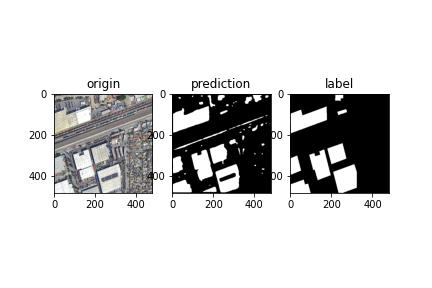

